# GROUP 5

# 1.0 UNIGRAM

In [1]:
#Import Libraries
import nltk, re
import numpy as np
import pandas as pd
from copy import deepcopy

In [2]:
#Read the Txt File
t1 = open("Text Corpus.txt")
corpus1 = t1.read()
#print(corpus1)

sent = corpus1.split('\n')
print("\n\nThere are ", len(sent), "sentences in the given txt file")
for i in sent:
    print(i)



There are  3 sentences in the given txt file
<s> He read a book </s>
<s> I read a different book </s>
<s> He read a book my Danielle </s>


In [3]:
nltk_tk = []
for i in sent:
    nltk_tk = nltk_tk + i.split(' ')
        
#Display the result
print("There are",len(nltk_tk), "Words in this text file (Dirty)")
print(nltk_tk)

nltk_tk = [nltk_tk for nltk_tk in nltk_tk if nltk_tk != "<s>" and nltk_tk !="</s>"]
print("\n\nThere are",len(nltk_tk), "Words in this text file (Clean without <s> and </s>)")
print(nltk_tk)

There are 21 Words in this text file (Dirty)
['<s>', 'He', 'read', 'a', 'book', '</s>', '<s>', 'I', 'read', 'a', 'different', 'book', '</s>', '<s>', 'He', 'read', 'a', 'book', 'my', 'Danielle', '</s>']


There are 15 Words in this text file (Clean without <s> and </s>)
['He', 'read', 'a', 'book', 'I', 'read', 'a', 'different', 'book', 'He', 'read', 'a', 'book', 'my', 'Danielle']


## 1.1 UNIGRAM - UNSMOOTHED

In [4]:
#Get Unique Words & Sort it
unique = list(set(nltk_tk))
unique.sort()
uniques = [unique for unique in unique if unique !="<s>" and unique!="</s>"]
uniques.sort()

tot_uni = len(uniques) #TOTAL NUMBER OF UNIQUE 

print("Unique - There are", tot_uni, "unique words without boundaries in the corpus, which are:")
#print(tot_uni)
for words in uniques:
    print(words)
    
#Get token without <s> and </s>
tokens = [nltk_tk for nltk_tk in nltk_tk if nltk_tk != "<s>" and nltk_tk !="</s>"]

tot_tokens = len(tokens) #TOTAL NUMBER OF TOKENS (CLEAN)

print("\n\nThere are", tot_tokens, " word tokens in the given txt file exclude <s> and </s>")
print(tot_tokens)
print(tokens)

Unique - There are 8 unique words without boundaries in the corpus, which are:
Danielle
He
I
a
book
different
my
read


There are 15  word tokens in the given txt file exclude <s> and </s>
15
['He', 'read', 'a', 'book', 'I', 'read', 'a', 'different', 'book', 'He', 'read', 'a', 'book', 'my', 'Danielle']


In [5]:
#Formula and Makrov theorem
uni_prob = {}

for word in uniques:
    wc = tokens.count(word)
    prob = float(wc)/tot_tokens
    uni_prob[word] = prob
    
print ("Unsmoothed Unigram Probability Values:\n")
for word, prob in uni_prob.items():
    print("P ({0}) = {1}".format(word,prob))        

Unsmoothed Unigram Probability Values:

P (Danielle) = 0.06666666666666667
P (He) = 0.13333333333333333
P (I) = 0.06666666666666667
P (a) = 0.2
P (book) = 0.2
P (different) = 0.06666666666666667
P (my) = 0.06666666666666667
P (read) = 0.2


## 1.2 UNIGRAM - SMOOTHED

In [6]:
#Copy Uniques words 
UNK_uniques = deepcopy(uniques)
UNK_uniques.append("<UNK>")
UNK_uniques.sort()

tot_UNK = len(UNK_uniques)

print("There are",tot_UNK, "words in this list:\n")
print(UNK_uniques)

There are 9 words in this list:

['<UNK>', 'Danielle', 'He', 'I', 'a', 'book', 'different', 'my', 'read']


In [7]:
#Calculate the Probabilities
uni_prob_smooth = {}

for word in uniques:
    wc1 = tokens.count(word)
    prob_smooth = (float(wc1)+1) / (tot_tokens + tot_uni + 1)
    uni_prob_smooth[word] = prob_smooth
 
print ("Smoothed Unigram Probability Values:\n")
for word, prob_smooth in uni_prob_smooth.items():
    print("P ({0}) = {1}" .format(word,prob_smooth))        

Smoothed Unigram Probability Values:

P (Danielle) = 0.08333333333333333
P (He) = 0.125
P (I) = 0.08333333333333333
P (a) = 0.16666666666666666
P (book) = 0.16666666666666666
P (different) = 0.08333333333333333
P (my) = 0.08333333333333333
P (read) = 0.16666666666666666


# 2.0 BIGRAM

In [8]:
#step 1 import libraries
import nltk
import numpy as np
import pandas as pd
from copy import deepcopy
from nltk import ngrams


In [9]:
#step 2 read dataset
file1 = open("Text Corpus.txt")

#read the file
corpus1 = file1.read()
print(corpus1)

<s> He read a book </s>
<s> I read a different book </s>
<s> He read a book my Danielle </s>


In [10]:
sentences = corpus1.split('\n')
print("There are ", len(sentences), "Sentences in this text file")
for sent in sentences:
    print(sent)

There are  3 Sentences in this text file
<s> He read a book </s>
<s> I read a different book </s>
<s> He read a book my Danielle </s>


In [11]:
#Perform pre-cleaning process
tokens = []
for sent in sentences:
    tokens = tokens + sent.split(' ')
    
print("Words found in text\n")
print(tokens)

print("\n")
uniTokens = list(set(tokens))
print("Unique words found in text\n")
uniTokens

Words found in text

['<s>', 'He', 'read', 'a', 'book', '</s>', '<s>', 'I', 'read', 'a', 'different', 'book', '</s>', '<s>', 'He', 'read', 'a', 'book', 'my', 'Danielle', '</s>']


Unique words found in text



['<s>', 'He', 'book', 'different', 'a', '</s>', 'read', 'my', 'I', 'Danielle']

In [12]:
len(uniTokens)

10

In [13]:
#Create Bigram model
bigrams = []
for sent in sentences:
    bigram = list(ngrams(sent.split(), 2))
    bigrams = bigrams + bigram

print("A total of", len(bigrams), "bigrams were found\n")
for i in bigrams:
    print(i)

A total of 18 bigrams were found

('<s>', 'He')
('He', 'read')
('read', 'a')
('a', 'book')
('book', '</s>')
('<s>', 'I')
('I', 'read')
('read', 'a')
('a', 'different')
('different', 'book')
('book', '</s>')
('<s>', 'He')
('He', 'read')
('read', 'a')
('a', 'book')
('book', 'my')
('my', 'Danielle')
('Danielle', '</s>')


In [14]:
#Unique bigrams
uniqueBigrams = list(set(bigrams))
uniqueBigrams.sort()
print("A total of ", len(uniqueBigrams), "unique bigrams were found\n")
for i in uniqueBigrams:
    print(i)
    

A total of  12 unique bigrams were found

('<s>', 'He')
('<s>', 'I')
('Danielle', '</s>')
('He', 'read')
('I', 'read')
('a', 'book')
('a', 'different')
('book', '</s>')
('book', 'my')
('different', 'book')
('my', 'Danielle')
('read', 'a')


## 2.1 BIGRAM - Unsmoothed 

In [15]:
#compute unsmoothed bigram using probability formula
bigramProbs = {}

for bigram in uniqueBigrams:
    word1 = bigram[0]
    word2 = bigram[1]
    for i in tokens:
        c2 = tokens.count(word1)
    c1 = bigrams.count(bigram)
    
    prob = float(c1)/float(c2)
    bigramProbs[bigram] = prob

print("Unsmoothed Bigram Probability values\n")
for bigram, prob in bigramProbs.items():
    print(bigram, ": ", prob)

Unsmoothed Bigram Probability values

('<s>', 'He') :  0.6666666666666666
('<s>', 'I') :  0.3333333333333333
('Danielle', '</s>') :  1.0
('He', 'read') :  1.0
('I', 'read') :  1.0
('a', 'book') :  0.6666666666666666
('a', 'different') :  0.3333333333333333
('book', '</s>') :  0.6666666666666666
('book', 'my') :  0.3333333333333333
('different', 'book') :  1.0
('my', 'Danielle') :  1.0
('read', 'a') :  1.0


## 2.2  BIGRAM - Smoothed

In [16]:
#compute smoothed bigram by adding 1 Laplace
smoothBigramProbs = {}

for bigram in uniqueBigrams:
    word1 = bigram[0]
    word2 = bigram[1]
    for i in tokens:
        c2 = tokens.count(word1)
    c1 = bigrams.count(bigram)
    
    prob = (float(c1)+1)/(float(c2)+len(uniTokens)+1)
    smoothBigramProbs[bigram] = prob

print("Smoothed Bigram Probability values\n")
for bigram, prob in smoothBigramProbs.items():
    print(bigram, ": ", prob)

Smoothed Bigram Probability values

('<s>', 'He') :  0.21428571428571427
('<s>', 'I') :  0.14285714285714285
('Danielle', '</s>') :  0.16666666666666666
('He', 'read') :  0.23076923076923078
('I', 'read') :  0.16666666666666666
('a', 'book') :  0.21428571428571427
('a', 'different') :  0.14285714285714285
('book', '</s>') :  0.21428571428571427
('book', 'my') :  0.14285714285714285
('different', 'book') :  0.16666666666666666
('my', 'Danielle') :  0.16666666666666666
('read', 'a') :  0.2857142857142857


## 3.4 SENTENCE PROBABILITIES

In [17]:
#sentence probabilities
dict= {}
col = ['Smoothed unigram sentence probability', 'Smoothed bigram sentence probability']
for sentence in sentences:
    dict[sentence] = {x:1 for x in col}#initialise dictionary for result
    split_text = sentence.split(' ')#split into tokens
    unigram = [word_tokens for word_tokens in split_text if word_tokens != "<s>" and word_tokens != "</s>"]#omit <s> and </s>
    bigram_var = list(nltk.bigrams(split_text))#bigram pairs
    
    #calculate sentence probabilities
    for token in unigram:
        dict[sentence]['Smoothed unigram sentence probability'] *= uni_prob_smooth[token]
    for bitoken in bigram_var:
        dict[sentence]['Smoothed bigram sentence probability'] *= smoothBigramProbs[bitoken]

#display output
for sentence, probabilities in dict.items():
    print("Sentence: {}".format(sentence))
    for uni_prob, bi_prob in probabilities.items():
        print('{}: {:.6f}'.format(uni_prob, bi_prob))
    print()

Sentence: <s> He read a book </s>
Smoothed unigram sentence probability: 0.000579
Smoothed bigram sentence probability: 0.000649

Sentence: <s> I read a different book </s>
Smoothed unigram sentence probability: 0.000032
Smoothed bigram sentence probability: 0.000035

Sentence: <s> He read a book my Danielle </s>
Smoothed unigram sentence probability: 0.000004
Smoothed bigram sentence probability: 0.000012



# 4.0 Supervised Text Classification

### 4.1 Sentiment Prediction

In [18]:
# Import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [19]:
# Read data
df = pd.read_csv('Musical_Instruments_Reviews.csv')
# Insert temp variable
df.insert(0, 'Id', range(0, len(df)))
df.head()

,Id,Reviews
0,0,"Not much to write about here, but it does exac..."
1,1,The product does exactly as it should and is q...
2,2,The primary job of this device is to block the...
3,3,Nice windscreen protects my MXL mic and preven...
4,4,This pop filter is great. It looks and perform...


In [20]:
# Declare SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [21]:
# Run the polarity score on the dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    myid = row['Id']
    text = row['Reviews']
    res[myid] = sia.polarity_scores(text)

print(res)

  0%|          | 0/10254 [00:00<?, ?it/s]

{0: {'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'compound': 0.6903}, 1: {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.9588}, 2: {'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'compound': -0.7003}, 3: {'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'compound': 0.5859}, 4: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.765}, 5: {'neg': 0.148, 'neu': 0.579, 'pos': 0.272, 'compound': 0.6848}, 6: {'neg': 0.114, 'neu': 0.796, 'pos': 0.09, 'compound': -0.2263}, 7: {'neg': 0.022, 'neu': 0.933, 'pos': 0.044, 'compound': 0.6586}, 8: {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.794}, 9: {'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'compound': 0.9086}, 10: {'neg': 0.047, 'neu': 0.857, 'pos': 0.096, 'compound': 0.8575}, 11: {'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.2724}, 12: {'neg': 0.065, 'neu': 0.845, 'pos': 0.09, 'compound': 0.1263}, 13: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.8957}, 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 15: {'neg': 

In [22]:
# Create a separate dataset to contain polarity score result
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index': 'Id'})
vader = vader.merge(df, how='left')
vader.head()

,Id,neg,neu,pos,compound,Reviews
0,0,0.057,0.790,0.153,0.6903,"Not much to write about here, but it does exac..."
1,1,0.000,0.819,0.181,0.9588,The product does exactly as it should and is q...
2,2,0.113,0.858,0.029,-0.7003,The primary job of this device is to block the...
3,3,0.055,0.746,0.199,0.5859,Nice windscreen protects my MXL mic and preven...
4,4,0.000,0.791,0.209,0.7650,This pop filter is great. It looks and perform...


In [23]:
# Classify sentiment based on compound score
sentiment = {}
for i in range (0,len(vader)):
    if (vader['compound'][i]) >= 0:
        sentiment[i] = 'Positive'
    else:
        sentiment[i] = 'Negative'

In [24]:
# Create a new dataframe to record the sentiment results 
sent_df = pd.DataFrame.from_dict(sentiment, orient ='index')
sent_df.rename(columns={0:'Sentiment'}, inplace = True)
sent_df.head()

,Sentiment
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive


In [25]:
# Join the sentiment result dataframe with original dataframe
df['Sentiment'] = sent_df
# Drop temp variable
df.drop(['Id'], axis = 1, inplace=True)
df.head()

,Reviews,Sentiment
0,"Not much to write about here, but it does exac...",Positive
1,The product does exactly as it should and is q...,Positive
2,The primary job of this device is to block the...,Negative
3,Nice windscreen protects my MXL mic and preven...,Positive
4,This pop filter is great. It looks and perform...,Positive


In [26]:
# Export final dataset to csv
df.to_csv('Musical_Instruments_Sentiment.csv',index=False)

## 4.2	Naïve Bayes Classifier

In [27]:
# Read data
df = pd.read_csv('Musical_Instruments_Sentiment.csv')
df.head()

,Reviews,Sentiment
0,"Not much to write about here, but it does exac...",Positive
1,The product does exactly as it should and is q...,Positive
2,The primary job of this device is to block the...,Negative
3,Nice windscreen protects my MXL mic and preven...,Positive
4,This pop filter is great. It looks and perform...,Positive


In [28]:
import matplotlib.pyplot as plt

Value counts for Sentiment (pos, neg)
Positive    9258
Negative     996
Name: Sentiment, dtype: int64


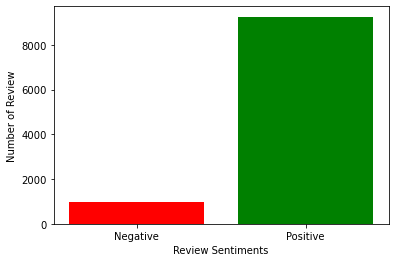

In [29]:
# Display sentiment distribution count
print("Value counts for Sentiment (pos, neg)")
print(df['Sentiment'].value_counts())
sentiment_count = df.groupby('Sentiment').count()

# Plot sentiment distribution using bar chart
plt.bar(sentiment_count.index.values, sentiment_count['Reviews'],
        color=('r','g'))
plt.xlabel("Review Sentiments")
plt.ylabel('Number of Review')

# Print chart
plt.show()

In [30]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), 
                     tokenizer = token.tokenize)
text_counts=cv.fit_transform(df['Reviews'])

In [31]:
from sklearn.model_selection import train_test_split

# Split data to training and test set
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.3, random_state=1)

In [32]:
# Build MultinomialNaiveBayes (MNB)
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MNB_classifier = MultinomialNB().fit(X_train, y_train)
predicted_MNB = MNB_classifier.predict(X_test)

# Display results
print("Accuracy: ", metrics.accuracy_score(y_test,predicted_MNB))
print("\nClassification Report: \n", metrics.classification_report(y_test,predicted_MNB))

Accuracy:  0.8995775105622359

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.36      0.03      0.06       302
    Positive       0.90      0.99      0.95      2775

    accuracy                           0.90      3077
   macro avg       0.63      0.51      0.50      3077
weighted avg       0.85      0.90      0.86      3077



In [34]:
# Display confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_MNB)
print(cm)

[[   9  293]
 [  16 2759]]


In [35]:
# Cross validation report
print("Cross Validation Report ")
from sklearn.model_selection import cross_validate
MNB_classifier_CV1 = MultinomialNB().fit(X_train, y_train)
cv_score_1 = cross_validate(MNB_classifier_CV1, X_train, y_train, cv=5)
sorted(cv_score_1.keys())
cv_score_1['test_score']
print("Accuracy: %0.2f" % (cv_score_1['test_score'].mean()))

Cross Validation Report 
Accuracy: 0.90
